In [1]:
# Imports necessários
import sys
sys.path.insert(0, '../src')

# Import das funções do pipeline
from crypto_ts_forecast.pipelines.data_ingestion.nodes import (
    fetch_bitcoin_klines,
    validate_raw_data
)

## 1. Fetch Bitcoin Data from Binance

In [2]:
# Parâmetros de configuração
SYMBOL = "BTCUSDT"
INTERVAL = "1d"  # Daily
YEARS_OF_DATA = 5

print(f"Buscando dados de {SYMBOL}...")
print(f"Intervalo: {INTERVAL}")
print(f"Anos de dados: {YEARS_OF_DATA}")

Buscando dados de BTCUSDT...
Intervalo: 1d
Anos de dados: 5


In [3]:
# Buscar dados da Binance
raw_data = fetch_bitcoin_klines(
    symbol=SYMBOL,
    interval=INTERVAL,
    years_of_data=YEARS_OF_DATA
)

print(f"\nDados obtidos: {len(raw_data)} registros")
raw_data.head()


Dados obtidos: 1825 registros


,timestamp,open,high,low,close,volume,close_time,quote_volume,trades,taker_buy_base,taker_buy_quote
0,2021-01-04,33000.05,33600.00,28130.0,31988.71,140899.885690,2021-01-04 23:59:59.999,4.429010e+09,2642408,69088.46923000,2173435409.01698791
1,2021-01-05,31989.75,34360.00,29900.0,33949.53,116049.997038,2021-01-05 23:59:59.999,3.743617e+09,2526851,59691.75475500,1927195093.64154965
2,2021-01-06,33949.53,36939.21,33288.0,36769.36,127139.201310,2021-01-06 23:59:59.999,4.431954e+09,2591783,63052.91465200,2199632470.22154891
3,2021-01-07,36769.36,40365.00,36300.0,39432.28,132825.700437,2021-01-07 23:59:59.999,5.062570e+09,2814686,65055.10713600,2482583239.85649706
4,2021-01-08,39432.48,41950.00,36500.0,40582.81,139789.957499,2021-01-08 23:59:59.999,5.568443e+09,2925632,67300.15521600,2684975445.97890497


In [4]:
# Informações sobre os dados
print("Informações do DataFrame:")
print(f"- Shape: {raw_data.shape}")
print(f"- Período: {raw_data['timestamp'].min()} até {raw_data['timestamp'].max()}")
print(f"- Colunas: {list(raw_data.columns)}")
print(f"\nEstatísticas do preço de fechamento:")
raw_data['close'].describe()

Informações do DataFrame:
- Shape: (1825, 11)
- Período: 2021-01-04 00:00:00 até 2026-01-02 00:00:00
- Colunas: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'trades', 'taker_buy_base', 'taker_buy_quote']

Estatísticas do preço de fechamento:


count      1825.000000
mean      54488.539545
std       29478.712008
min       15781.290000
25%       29430.170000
50%       46464.660000
75%       69310.460000
max      124658.540000
Name: close, dtype: float64

## 2. Validate Raw Data

In [5]:
# Validar os dados
validated_data = validate_raw_data(raw_data)

print(f"Dados validados: {len(validated_data)} registros")
print(f"Valores nulos: {validated_data.isnull().sum().sum()}")
validated_data.tail()

Dados validados: 1825 registros
Valores nulos: 0


,timestamp,open,high,low,close,volume,close_time,quote_volume,trades,taker_buy_base,taker_buy_quote
1820,2025-12-29,87952.71,90406.08,86806.50,87237.13,19894.98575,2025-12-29 23:59:59.999,1.762012e+09,4793589,10079.10102000,892298235.37550200
1821,2025-12-30,87237.13,89400.00,86845.66,88485.49,13105.91001,2025-12-30 23:59:59.999,1.155016e+09,3542176,6561.56089000,578303387.40254340
1822,2025-12-31,88485.50,89200.00,87250.00,87648.22,11558.62047,2025-12-31 23:59:59.999,1.019747e+09,2897396,5432.03408000,479104976.96454890
1823,2026-01-01,87648.21,88919.45,87550.43,88839.04,6279.57133,2026-01-01 23:59:59.999,5.529916e+08,1449281,3123.64536000,275090077.28838170
1824,2026-01-02,88839.05,88890.09,88800.00,88853.56,29.41516,2026-01-02 23:59:59.999,2.613660e+06,5915,21.54879000,1914761.90049780


## 3. Visualização dos Dados

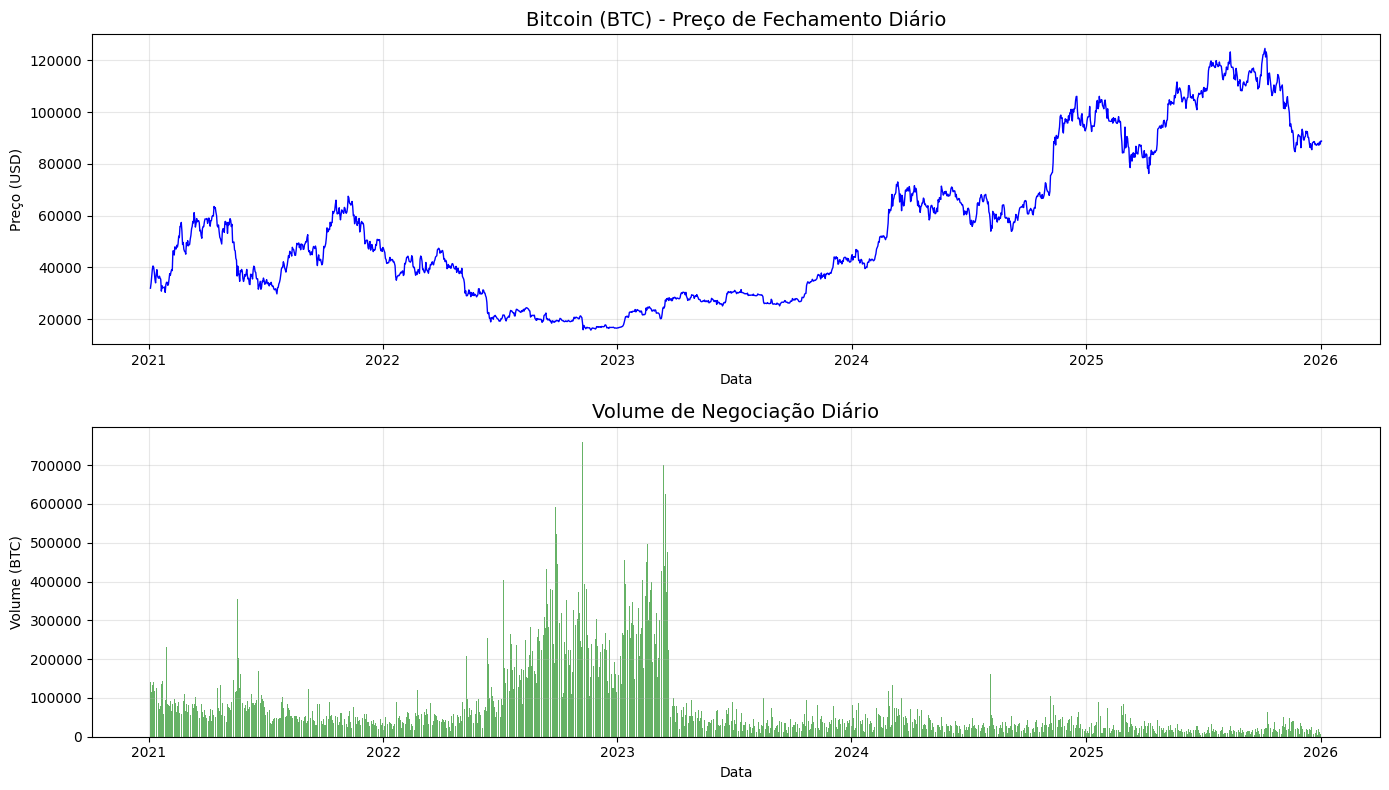

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Gráfico de preço
axes[0].plot(validated_data['timestamp'], validated_data['close'], 'b-', linewidth=1)
axes[0].set_title('Bitcoin (BTC) - Preço de Fechamento Diário', fontsize=14)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Preço (USD)')
axes[0].grid(True, alpha=0.3)

# Gráfico de volume
axes[1].bar(validated_data['timestamp'], validated_data['volume'], color='green', alpha=0.6)
axes[1].set_title('Volume de Negociação Diário', fontsize=14)
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Volume (BTC)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# Salvar dados para uso nos próximos notebooks
validated_data.to_parquet('../data/02_intermediate/bitcoin_validated.parquet', compression='gzip')
print("Dados salvos em data/02_intermediate/bitcoin_validated.parquet")

Dados salvos em data/02_intermediate/bitcoin_validated.parquet
